In [17]:
# reading in spare-ice sample file
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
#import gzip
import pyresample as pr
from pyresample import image, geometry
import sys
sys.path.append('/home/dudavid/src/pyco/')
from ddfunk import *

paf = '/home/dudavid/Dendrite/others/'
file = paf+'granule_0_8_noaa18_14_33.nc'
    
f = Dataset(file,'r')
lo, la = f.variables['LON'][:], f.variables['LAT'][:] #1440x720 grids
iw = np.array(f.variables['IWP'])

iwp = np.array(.001 * iw)
#idx = la > 50.0
#print(type(idx))
#print(idx)
print(info(iwp))

[0.0, 14.209042, 0.039607439, 0.289837]


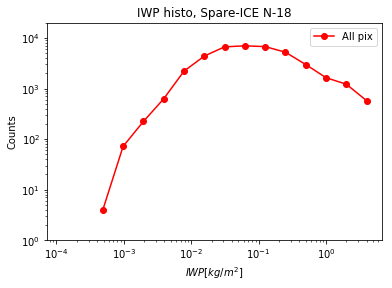

In [18]:
# calculate histogram of IWP
binz = [2**x for x in range(-14,3)]
iwpa = np.array(iwp)
hist, bin_edges = np.histogram(iwpa,bins=binz)
fig = plt.figure()
plt.plot(binz[1:],hist,'r-o',label='All pix')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$IWP [kg/m^2]$')
plt.ylabel('Counts')
plt.title('IWP histo, Spare-ICE N-18')
plt.ylim(1e0,2e4)
plt.legend()
plt.show()

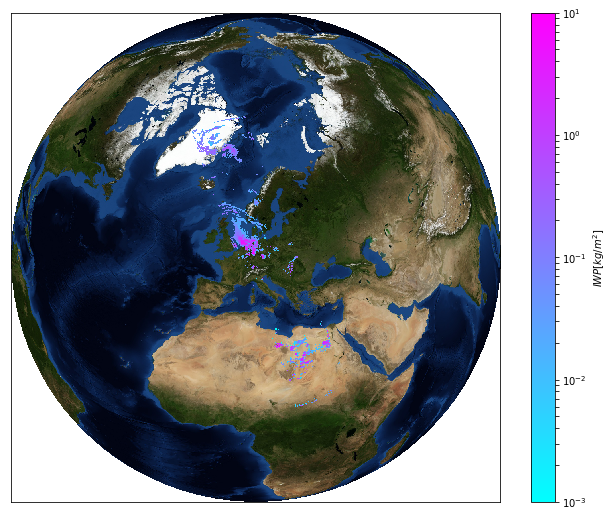

In [19]:
#plt.figure(num=1,figsize=(15,6))
#area_def = pr.utils.load_area('/home/dudavid/src/pyco/areas.cfg', 'pc_world')
#area_def = pr.utils.load_area('/home/dudavid/src/pyco/areas.cfg', 'ease_sh') #no work?
plt.figure(num=1,figsize=(11,9))
area_def = pr.utils.load_area('/home/dudavid/src/pyco/areas.cfg', 'ortho')
swath_def = pr.geometry.SwathDefinition(lo, la)
result = pr.kd_tree.resample_nearest(swath_def, iwp, area_def, \
                                     radius_of_influence=20000, fill_value=None)
bmap = pr.plot.area_def2basemap(area_def)
bmng = bmap.bluemarble()
cmap2 = mpl.cm.cool
col = bmap.imshow(result, origin='upper', \
                  cmap=cmap2,norm=colors.LogNorm(vmin=.001,vmax=10.0))
cb = plt.colorbar(label=r'$IWP [kg/m^2]$')
plt.show()
#pr.plot.show_quicklook(area_def, result, label='IWP Spare-ICE')